In [1]:
#This is where we will write up the group presentation

In [1]:
#This is a test of the updating changes for the file.

In [2]:
#test number two

8*5

40

In [5]:
import numpy as np                   # Numerical computation library
import pandas as pa                  # Dataframe and Data manipulation Library
import matplotlib.pyplot as plt      # Basic plotting functionality Library
import seaborn as sn     

In [6]:
pam = pa.read_csv('../police-arrests-made.csv', sep = ';')

In [7]:
#Given the crime commited, can we determine the age and gender of the offender???

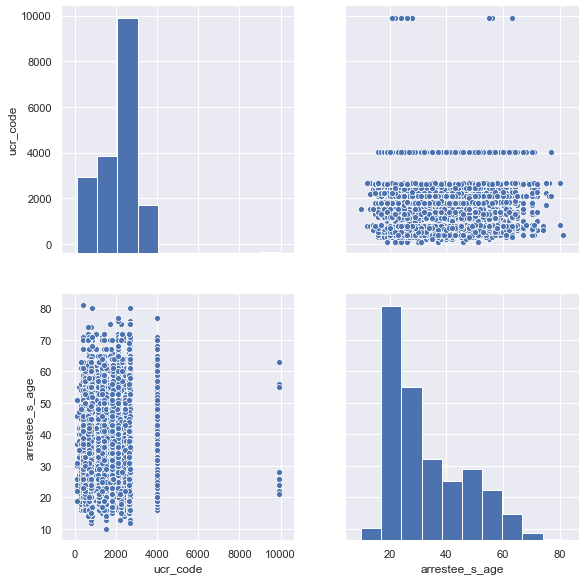

In [9]:
sn.set(style = 'darkgrid')

p = sn.pairplot(pam)   

p.fig.set_size_inches(9, 9)  


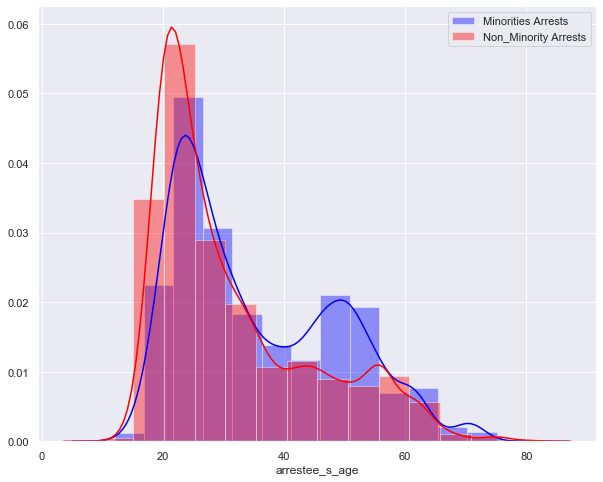

In [10]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='Minorities Arrests', kde=True, bins=14) 
sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='Non_Minority Arrests', kde=True, bins=14)
plt.legend();

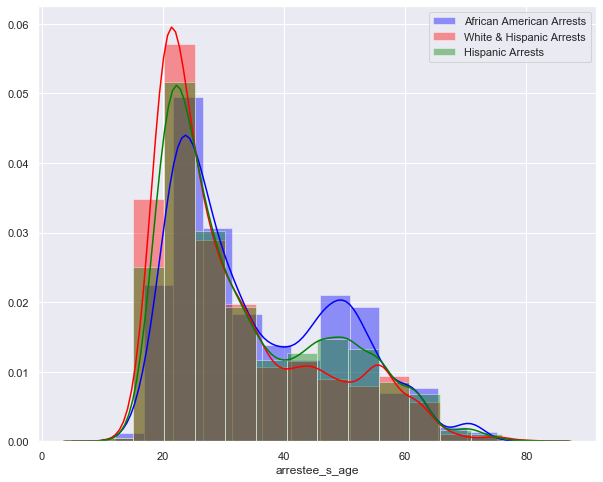

In [11]:
sn.set(style = 'darkgrid') 
plt.figure(figsize = (10, 8))

sn.distplot(pam[pam.arrestee_s_race=='B'].arrestee_s_age, color='blue', 
            label='African American Arrests', kde=True, bins=14) 

sn.distplot(pam[pam.arrestee_s_race!='B'].arrestee_s_age, color='red', 
            label='White & Hispanic Arrests', kde=True, bins=14)

sn.distplot(pam[pam.arrestee_ethnicity!='H'].arrestee_s_age, color='green', 
            label='Hispanic Arrests', kde=True, bins=14)

plt.legend();

In [12]:
def onehot(df, feature):
    '''A function to do one-hot-encoding of a feature from a dataframe. df = dataframe'''

    v = list(set(df[feature])) # Make an iterable of the unique values for the feature
    
    for c in df.index: # cycle through the samples
        t = df.loc[c, feature]
        
        for test in v:
            if pa.isna(test):  # nan values are sort of a problem and have to be handled separately
                if pa.isna(t):
                    df.loc[c, '{}_nan'.format(feature)] = 1
                else:
                    df.loc[c, '{}_nan'.format(feature)] = 0
            else:
                if t == test:
                    df.loc[c, '{}_{}'.format(feature, test)] = 1  # Makes a new feature with name feature_value
                                                              # and codes it as a 1 if that was the value
                else:
                    df.loc[c, '{}_{}'.format(feature, test)] = 0  # and 0 otherwise
            
    return df.drop(feature, axis=1) # returns a dataframe with the encoded feature removed

In [14]:
pam2 = onehot(pam, 'arrestee_s_race')
pam2[30:40]

,armainid,arrest_date,arrest_time,address,charge_description,ucr_code,felony_or_misdemeanor,arrestee_s_age,arrestee_s_sex,arrestee_ethnicity,arrestee_s_race_nan,arrestee_s_race_B,arrestee_s_race_O,arrestee_s_race_W,arrestee_s_race_U,arrestee_s_race_I,arrestee_s_race_H,arrestee_s_race_A
30,"31,697",2014-04-01,8:19 AM,"100 E FRANKLIN ST CHAPEL HILL, NC 27514",DRIVING W/LIC REVOKED,4010.0,M,26.0,M,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31,"31,719",2014-04-05,2:15 AM,"PRITCHARD AVE & CARR ST CHAPEL HILL, NC 27516",OPEN CONTAINER,2680.0,M,22.0,F,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32,"31,730",2014-04-05,2:25 AM,"PRITCHARD AVE NEAR CARR ST CHAPEL HILL, NC 27516",OPEN CONTAINER,2680.0,M,21.0,F,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
33,"31,761",2014-04-10,12:20 PM,"828 MARTIN LUTHER KING JR BLVD CHAPEL HILL, NC...",LARCENY - ALL OTHER,690.0,M,26.0,M,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34,"31,763",2014-04-10,4:30 PM,"FORSYTH AND LEGION RD CHAPEL HILL, NC 27514",PWISD II CS,1810.0,F,31.0,M,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
35,"31,763",2014-04-10,4:30 PM,"FORSYTH AND LEGION RD CHAPEL HILL, NC 27514",DRUGS-MISD POSS,1810.0,M,31.0,M,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36,"31,768",2014-04-10,11:28 PM,"400 BLK CHURCH STREET CHAPEL HILL, NC 27516",OPEN CONTAINER,2680.0,M,21.0,M,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
37,"31,835",2014-04-25,11:40 PM,"110 W CAMERON AVE/PITTSBORO ST CHAPEL HILL, NC...",UNDERAGE POSSESSION,2222.0,M,19.0,F,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
38,"31,844",2014-04-27,1:40 AM,"112 1/2 W. FRANKLIN ST CHAPEL HILL, NC 27516",UNDERAGE POSSESSION,2222.0,M,21.0,F,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,"31,845",2014-04-26,11:40 PM,"100 BLOCK MALLETTE ST CHAPEL HILL, NC 27516",OPEN CONTAINER,2680.0,M,29.0,M,H,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
set(pam.arrestee_s_race)

{'A', 'B', 'H', 'I', 'O', 'U', 'W', nan}

In [16]:
set(pam.arrestee_ethnicity)

{'H', nan}

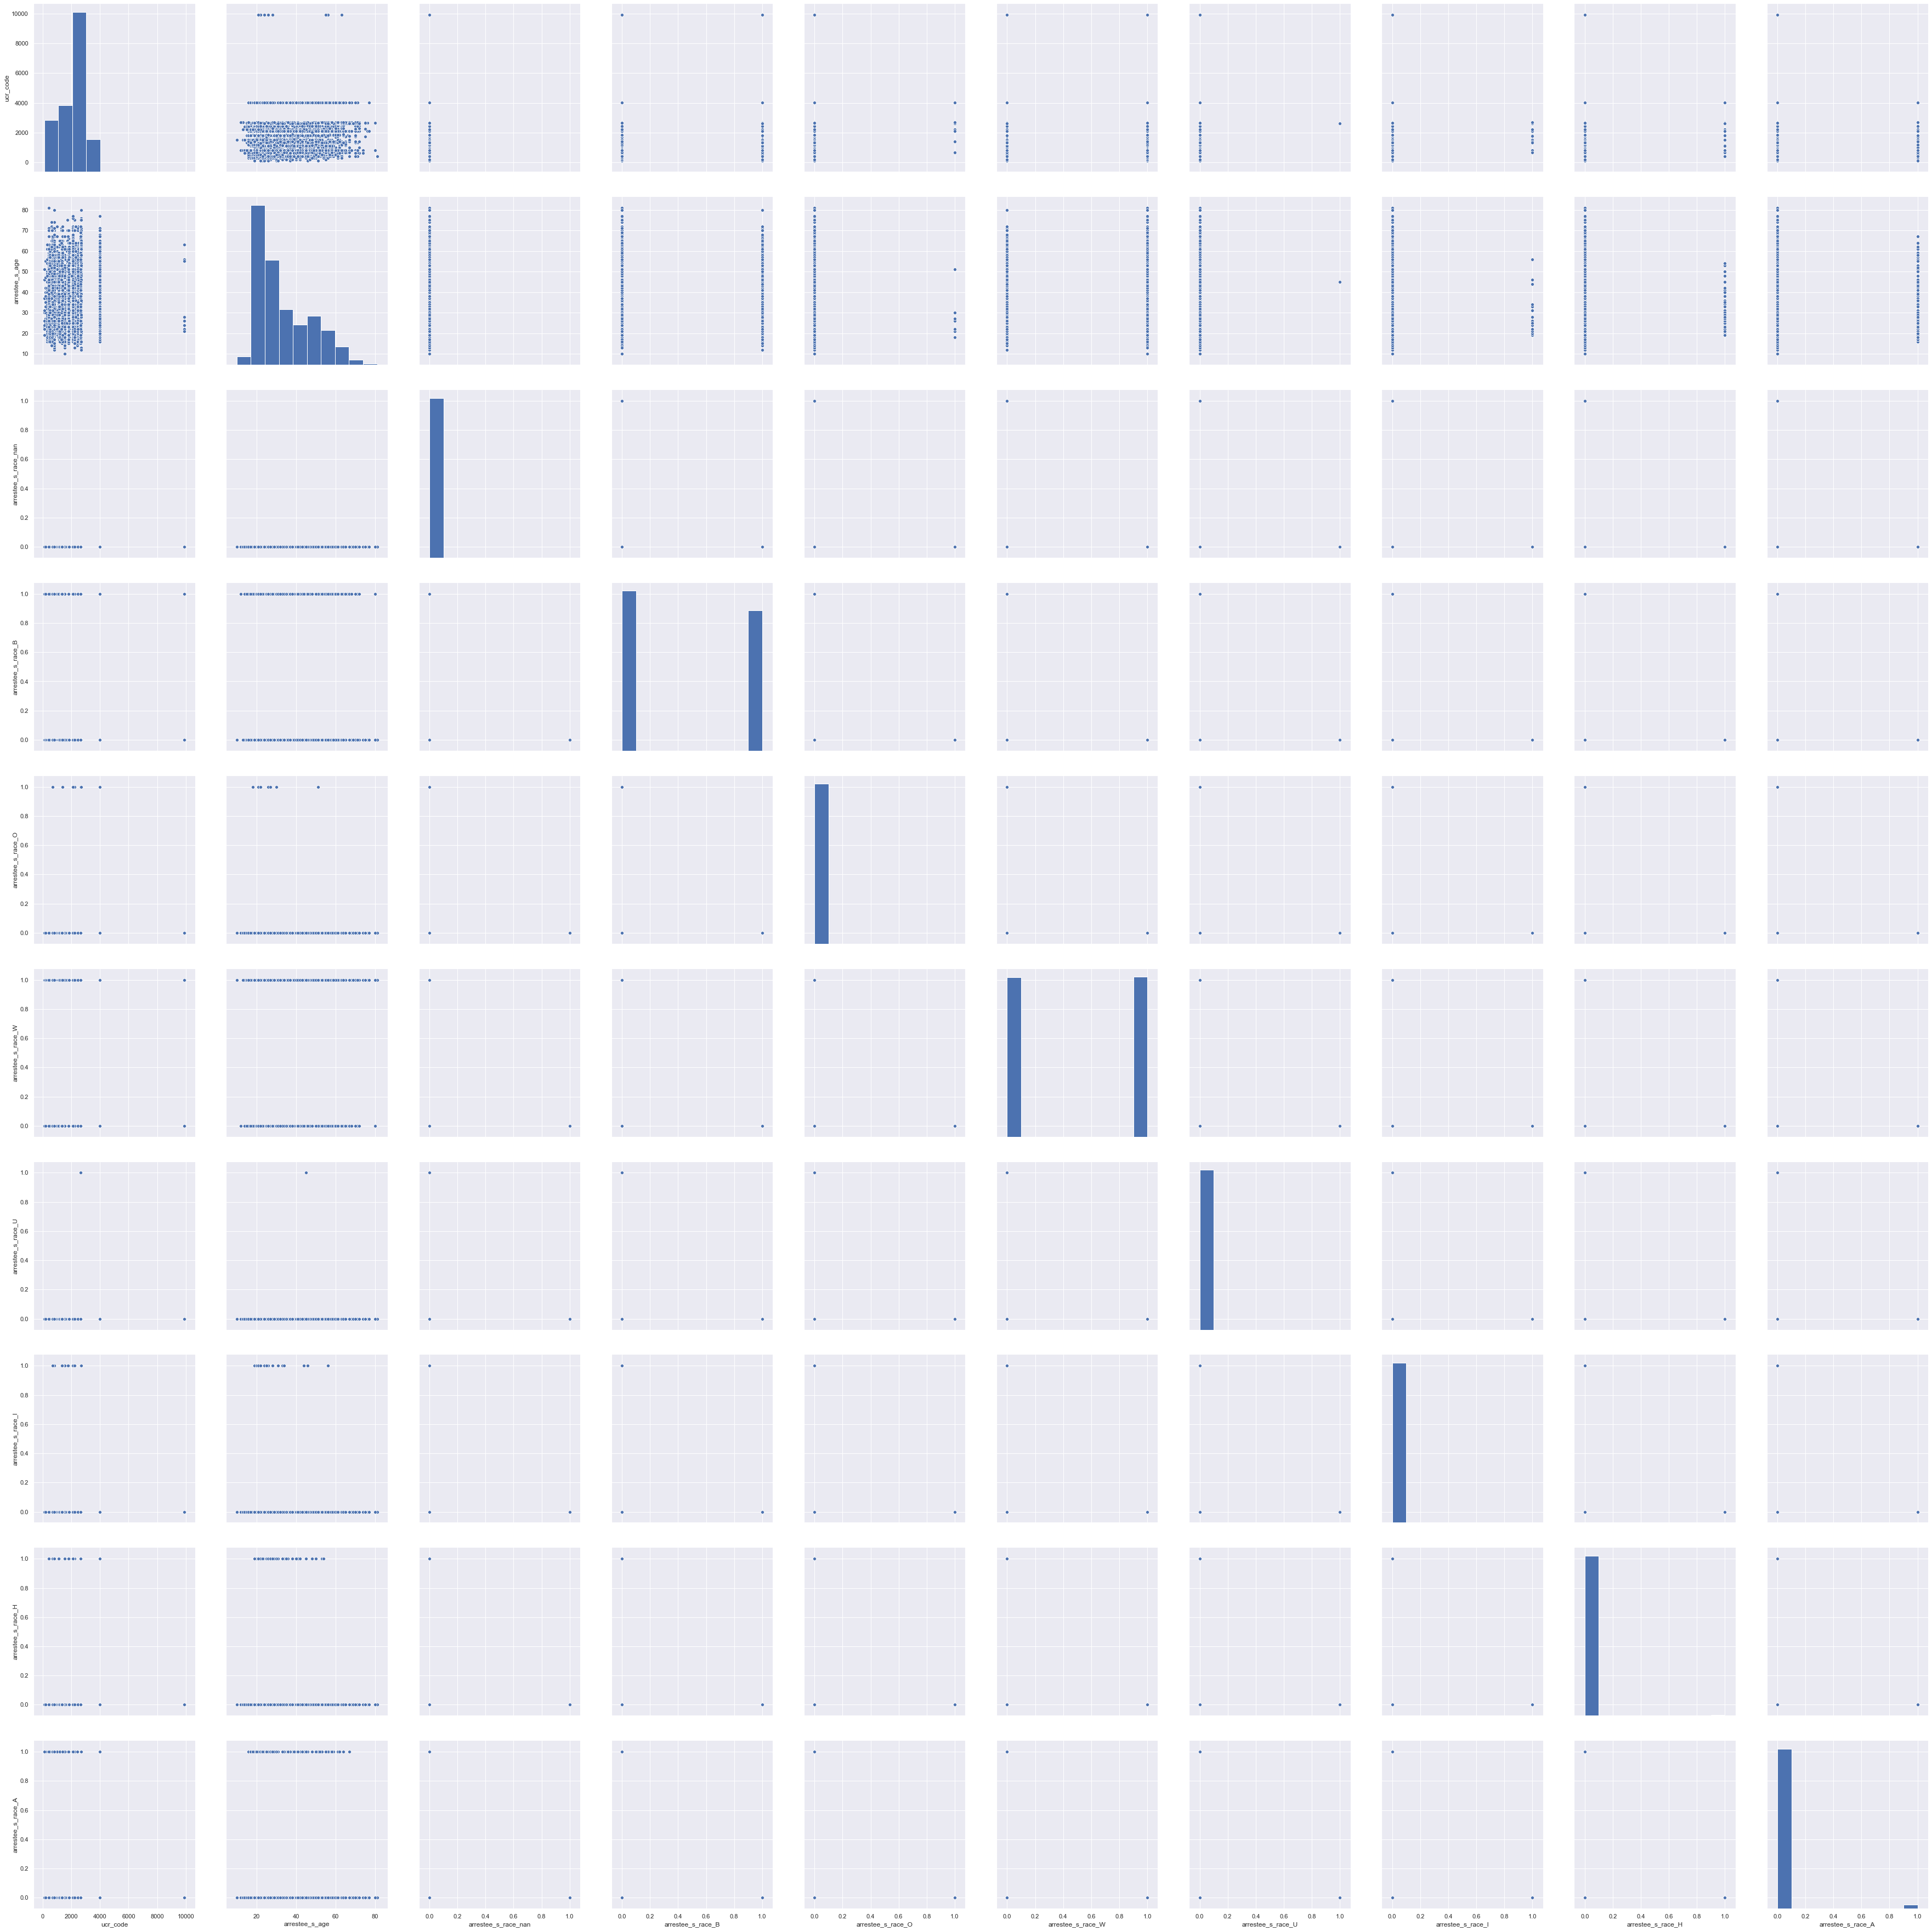

In [20]:
sn.set(style = 'darkgrid')

p = sn.pairplot(pam)   

p.fig.set_size_inches(50, 50)  